[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googleapis/langchain-google-alloydb-pg-python/blob/main/samples/langchain_quick_start.ipynb)

---
# AlloyDB

AlloyDB for PostgreSQL is a fully managed, PostgreSQL-compatible database service that's designed for your most demanding workloads, including hybrid transactional and analytical processing. AlloyDB pairs a Google-built database engine with a cloud-based, multi-node architecture to deliver enterprise-grade performance, reliability, and availability.



## Install dependencies
First you will need to install the dependencies needed to run this demo app.

In [ ]:
%pip install langchain-google-alloydb-pg langchain langchain-google-vertexai google-cloud-alloydb-connector[pg8000] langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 784.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6

## Authenticate to Google Cloud within Colab
In order to access your Google Cloud Project from this notebook, you will need to Authenticate as an IAM user.

In [ ]:
from google.colab import auth

auth.authenticate_user()

## Connect Your Google Cloud Project

In [ ]:
# Please fill in these values.
project_id = "rag-alloydb-poc-450115"

# Configure gcloud.
!gcloud config set project {project_id}

Updated property [core/project].


## Enable APIs for AlloyDB and Vertex AI within your project

You will need to enable these APIs in order to create an AlloyDB database and utilize Vertex AI as an embeddings service!

In [ ]:
# enable GCP services
!gcloud services enable alloydb.googleapis.com aiplatform.googleapis.com

Operation "operations/acat.p2-247980882241-8405c475-233e-4883-bc87-f7b7a91c188c" finished successfully.


## Set up AlloyDB
You will need a Postgres AlloyDB instance for the following stages of this notebook. Please set the following variables.

In [ ]:
region = "us-east4"
cluster_name = "alloydb-cluster"
instance_name = "primary-instance"
database_name = "movie"
password = input("Please provide a password to be used for 'postgres' database user: ")

Please provide a password to be used for 'postgres' database user: postgres


### Create an AlloyDB Instance
If you have already created an AlloyDB Cluster and Instance, you can skip these steps and skip to the connectivity section.

> ⏳ - Creating an AlloyDB cluster may take a few minutes.

In [ ]:
# Quick input validations.
assert region, "⚠️ Please provide a Google Cloud region"
assert instance_name, "⚠️ Please provide the name of your instance"
assert database_name, "⚠️ Please provide the name of your database_name"

# create the AlloyDB Cluster
!gcloud beta alloydb clusters create {cluster_name} --password={password} --region={region}
#gcloud beta alloydb clusters create {cluster_name} --password={password} --region={region}
# Enable Service Networking API From UI
# Enable Compute Engine API from UI
# IF DB creation fails then create Using UI
    #In Primary Cluster Enable public ID of from UI

Operation ID: operation-1743594328288-631ca3091ebad-a7e487d1-aeaca219


# **Create** an instance attached to our cluster with the following command.
> ⏳ - Creating an AlloyDB instance may take a few minutes.

In [ ]:
!gcloud beta alloydb instances create {instance_name} --instance-type=PRIMARY --cpu-count=2 --region={region} --cluster={cluster_name}

Operation ID: operation-1743594346511-631ca31a7fdff-8abf74ed-0529bb7c


To connect to your AlloyDB instance from this notebook, you will need to enable public IP on your instance.

Alternatively, you can follow [these instructions](https://cloud.google.com/alloydb/docs/connect-external) to connect to an AlloyDB for PostgreSQL instance with Private IP from outside your VPC.

In [ ]:
!gcloud beta alloydb instances update {instance_name} --region={region} --cluster={cluster_name} --assign-inbound-public-ip=ASSIGN_IPV4
#Enable public IP of from UI

ERROR: (gcloud.beta.alloydb.instances.update) INVALID_ARGUMENT: The request was invalid: password complexity flag password.enforce_complexity is required when public IP is enabled
- '@type': type.googleapis.com/google.rpc.BadRequest
  fieldViolations:
  - field: database_flags
- '@type': type.googleapis.com/google.rpc.RequestInfo
  requestId: f5c5c6c953df2663


Now create a connection pool to connect to our instance.

**SQLAlchemy:** This package helps you talk to the database without writing SQL directly all the time. It makes connecting and running queries with PostgreSQL (or any database) much easier.

**pg8000:** This is the driver that connects Python to PostgreSQL. Since we’re working with AlloyDB (which is PostgreSQL-based), this driver is how we talk to it from Python.

**Google Cloud AlloyDB Connector:** To connect to AlloyDB securely, you need this package. It handles all the Google Cloud magic to get the connection set up behind the scenes.

In [ ]:
from google.cloud.alloydb.connector import Connector, IPTypes
import sqlalchemy

# initialize Connector object
connection_string = f"projects/{project_id}/locations/{region}/clusters/{cluster_name}/instances/{instance_name}"
connector = Connector()


# function to return the database connection
def getconn():
    conn = connector.connect(
        connection_string,
        "pg8000",
        user="postgres",
        password=password,
        db="postgres",
        enable_iam_auth=False,
        ip_type=IPTypes.PUBLIC,
    )
    return conn


# create connection pool for PostgreSQL DB
pool = sqlalchemy.create_engine(
    "postgresql+pg8000://", creator=getconn, isolation_level="AUTOCOMMIT"
)

### Create a Database

Next you will create database to store the data for this application using the connection pool. Enabling public IP takes a few minutes, you may get an error that there is no public IP address. Please wait and retry this step if you hit an error!

In [ ]:
with pool.connect() as db_conn:
    db_conn.execute(sqlalchemy.text(f"CREATE DATABASE {database_name}"))
connector.close()

#### Connect to our New Database

Now you will add in a connection function that connects to your new database!

In [ ]:
from google.cloud.alloydb.connector import Connector, IPTypes
import sqlalchemy


connection_string = f"projects/{project_id}/locations/{region}/clusters/{cluster_name}/instances/{instance_name}"
# initialize Connector object
connector = Connector()


# function to return the database connection
def getconn():
    conn = connector.connect(
        connection_string,
        "pg8000",
        user="postgres",
        password=password,
        db=database_name,
        enable_iam_auth=False,
        ip_type=IPTypes.PUBLIC,
    )
    return conn


# create connection pool
pool = sqlalchemy.create_engine("postgresql+pg8000://", creator=getconn)


### Import data to your database


In [ ]:
import pandas as pd

# Google Drive file ID (Extract from shareable link)
file_id = "1rD3z2Vp3YzaJCV87xEDYkNjYae7CsxYS"
# Construct the correct download URL
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
# Read CSV file from Google Drive
df_movie_details = pd.read_csv(download_url)
df = df_movie_details.head(100) # first 100 movie to reduce database size

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In this next step you will:

1. Create the table into store data
2. And insert the data from the CSV into the database table

In [ ]:
import pandas as pd
#netflix_titles - Table name
create_table_cmd = sqlalchemy.text(
    """
    CREATE TABLE netflix_titles (
        show_id VARCHAR,
        type VARCHAR,
        title VARCHAR,
        director VARCHAR,
        "cast" VARCHAR,
        country VARCHAR,
        date_added VARCHAR,
        release_year INTEGER,
        rating VARCHAR,
        duration VARCHAR,
        listed_in VARCHAR,
        description TEXT
    )
    """
)

insert_data_cmd = sqlalchemy.text(
    """
    INSERT INTO netflix_titles (
        show_id, type, title, director, "cast", country, date_added,
        release_year, rating, duration, listed_in, description
    )
    VALUES (
        :show_id, :type, :title, :director, :cast, :country, :date_added,
        :release_year, :rating, :duration, :listed_in, :description
    )
    """
)
parameter_map = [
    {
        "show_id": row["show_id"],
        "type": row["type"],
        "title": row["title"],
        "director": row["director"],
        "cast": row["cast"],
        "country": row["country"],
        "date_added": row["date_added"],
        "release_year": row["release_year"],
        "rating": row["rating"],
        "duration": row["duration"],
        "listed_in": row["listed_in"],
        "description": row["description"],
    }
    for index, row in df.iterrows()
]

with pool.connect() as db_conn:
    db_conn.execute(create_table_cmd)
    db_conn.execute(
        insert_data_cmd,
        parameter_map,
    )
    db_conn.commit()
connector.close()

### DB After Inserting DATA

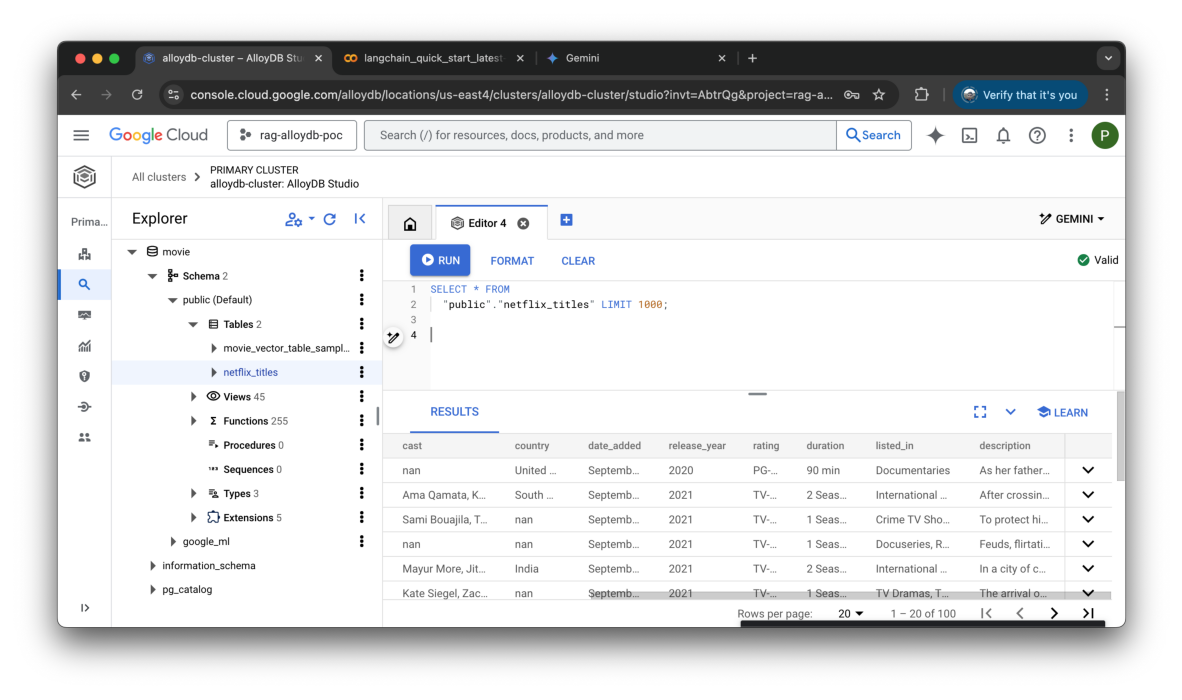

In [21]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Extracted File ID from your shared link
file_id = "1mmkEo3GvPzvbjCDhczcAIGASMDV7j1RF"
image_url = f"https://drive.google.com/uc?id={file_id}"

# Fetch the image
response = requests.get(image_url)
if response.status_code == 200:
    plt.figure(figsize=(15, 10))
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Error loading image. Check if the link is public.")


## Use case 1: AlloyDB for Postgres as a document loader

---



Now that you have data in your database, you are ready to use AlloyDB for PostgreSQL as a document loader. This means you will pull data from the database and load it into memory as documents. These documents can be used to create a vector store.

First, create a connection to your AlloyDB for PostgreSQL instance using the `AlloyDBEngine` class.

In [ ]:
from langchain_google_alloydb_pg import AlloyDBEngine, Column, AlloyDBLoader

engine = AlloyDBEngine.from_instance(
    project_id=project_id,
    instance=instance_name,
    region=region,
    cluster=cluster_name,
    database=database_name,
    user="postgres",
    password=password,
)

The `AlloyDBLoader` requires an `AlloyDBEngine` object to define the database connection and a `query` to define which data is to be retrieved. The `content_columns` argument can be used to define the columns that will be used as "content" in the document object we will later construct. The rest of the columns in that table will become the "metadata" associated with the documents.

In [ ]:
table_name = "netflix_titles"
content_columns = ["title", "director", "cast", "description"]
loader = await AlloyDBLoader.create(
    engine=engine,
    query=f"SELECT * FROM {table_name};",
    content_columns=content_columns,
)

Use method `aload()` to pull documents from out database. You can see the first 5 documents from the database here.

In [ ]:
documents = await loader.aload()
print(f"Loaded {len(documents)} from the database. 5 Examples:")
for doc in documents[:3]:
    print(doc)

Loaded 100 from the database. 5 Examples:
page_content='Dick Johnson Is Dead Kirsten Johnson nan As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.' metadata={'show_id': 's1', 'type': 'Movie', 'country': 'United States', 'date_added': 'September 25, 2021', 'release_year': 2020, 'rating': 'PG-13', 'duration': '90 min', 'listed_in': 'Documentaries'}
page_content='Blood & Water nan Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.' metadata={'show_id': 's2', 'type': 'TV Show', 'country': 'South

Nice, you just used AlloyDB for Postgres as a document loader!

# Dynamic Embedding

AlloyDB offers dynamic embedding by integrating with Vertex AI. It generates and stores vector embeddings directly within the database using SQL functions. This simplifies AI applications by enabling real-time embedding generation and querying alongside transactional data.

SQL Code to generate Embedding
```
ALTER TABLE netflix_titles ADD COLUMN IF NOT EXISTS embedding REAL[768];

UPDATE "netflix_titles"
SET embedding = embedding('text-embedding-005', CONCAT(title, ' ', description));

```

Note: If pgvector is Not Installed, Enable It:
`CREATE EXTENSION IF NOT EXISTS vector;`

## Add AlloyDB extensions
Enable an extension by connecting to a database in an AlloyDB cluster's primary instance, then running a CREATE EXTENSION command. More details can be found [here](https://cloud.google.com/alloydb/docs/reference/extensions#enable)



It has some inbuild function to generate dynamic embedding.

In [ ]:
# Add extensions
google_ml_integration_cmd = sqlalchemy.text(
    "CREATE EXTENSION IF NOT EXISTS google_ml_integration CASCADE"
)
vector_cmd = sqlalchemy.text("CREATE EXTENSION IF NOT EXISTS vector")

# Execute the queries
with pool.connect() as db_conn:
    db_conn.execute(google_ml_integration_cmd)
    db_conn.execute(vector_cmd)
    db_conn.commit()
connector.close()


## Create a column that stores text embeddings and an Index using AlloyDB


*   The Vertex AI text-embeddings API lets you create a text embedding using Generative AI on Vertex AI. Text embeddings are numerical representations of text that capture relationships between words and phrases.

*   IVFFlat is a type of vector index for approximate nearest neighbor search. It is a frequently used index type that can improve performance when querying highly-dimensional vectors, like those representing embeddings.










In [ ]:
embedding_column = "embedding"
distance_function = "vector_cosine_ops"
TABLE_NAME = 'netflix_titles'
EMBEDDING_MODEL = 'text-embedding-005'
DIMENSIONS = 768

# Add column to store embeddings
add_column_cmd = sqlalchemy.text(
    f"ALTER TABLE {TABLE_NAME} ADD COLUMN {embedding_column} vector({DIMENSIONS});"
)

# Generate embeddings for `title` and `description` columns of the dataset
embedding_cmd = sqlalchemy.text(
    f"UPDATE {TABLE_NAME} SET {embedding_column} = embedding('{EMBEDDING_MODEL}', title || ' ' || description);"
)

# Create an IVFFlat index on the table with embedding column and cosine distance
index_cmd = sqlalchemy.text(
    f"CREATE INDEX ON {TABLE_NAME} USING ivfflat ({embedding_column} {distance_function})"
)

In [ ]:
# Execute the queries
with pool.connect() as db_conn:
    try:
        db_conn.execute(add_column_cmd)
    except:
        print(f"Column {embedding_column} already exists")
    print("Creating Embeddings...")
    db_conn.execute(embedding_cmd)
    print("Creating Index...")
    db_conn.execute(index_cmd)
    print("Committing...")
    db_conn.commit()
    print("Done")
connector.close()


Creating Embeddings...
Creating Index...
Committing...
Done


Note : Above operation takes 12 minutes to generate dynamic embedding for 100 Row

### DB after dynamic embedding

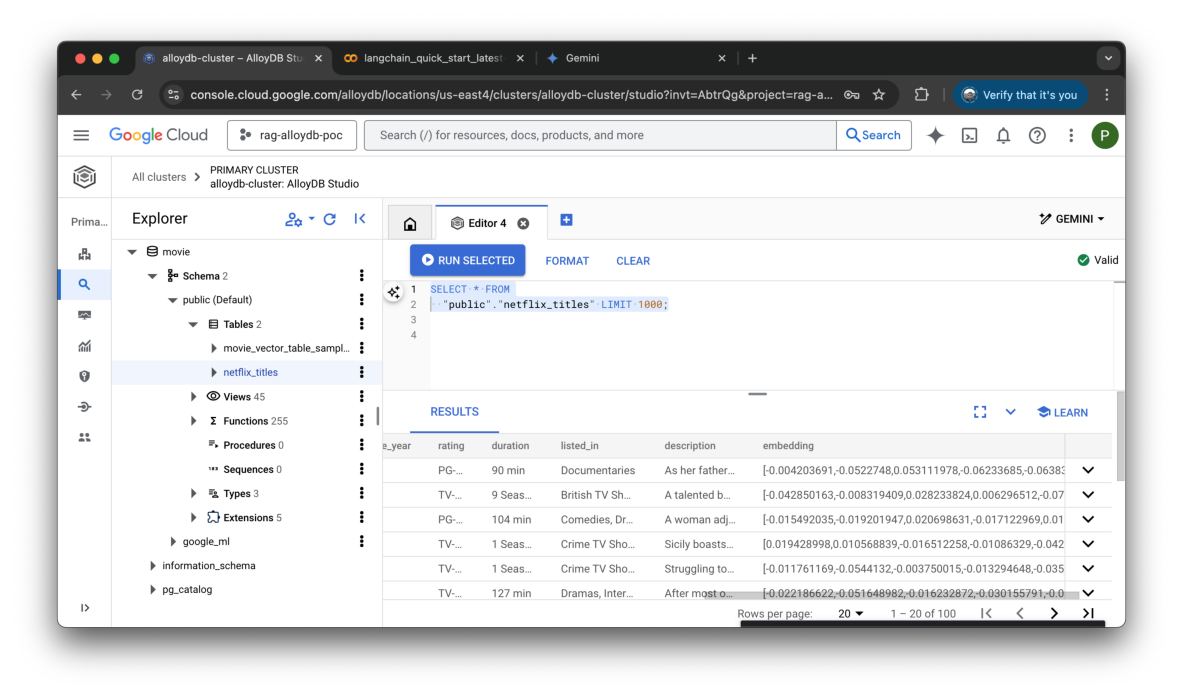

In [23]:
# Extracted File ID from your shared link
file_id = "1BgjUy3IBWzTjXgwTOWbBgwcWbGQ0mAja"
image_url = f"https://drive.google.com/uc?id={file_id}"

# Fetch the image
response = requests.get(image_url)
if response.status_code == 200:
    plt.figure(figsize=(15, 10))
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Error loading image. Check if the link is public.")

## Use case 2: AlloyDB for PostgreSQL as Vector Store

### Create Your Vector Store table

Create a vector store table that can preserve the Document's metadata by using the method `init_vectorstore_table` and defining specific metadata columns. The vector size is required. The example shows the vector size, `768`, that corresponds with the length of the vectors computed by the model our embeddings service uses, Vertex AI's `textembedding-gecko`.

In [ ]:
from langchain_google_alloydb_pg import AlloyDBEngine, Column

sample_vector_table_name = "movie_vector_table_samples"

engine = AlloyDBEngine.from_instance(
    project_id=project_id,
    instance=instance_name,
    region=region,
    cluster=cluster_name,
    database=database_name,
    user="postgres",
    password=password,
)

engine.init_vectorstore_table(
    sample_vector_table_name,
    vector_size=768,
    metadata_columns=[
        Column("show_id", "VARCHAR", nullable=True),
        Column("type", "VARCHAR", nullable=True),
        Column("country", "VARCHAR", nullable=True),
        Column("date_added", "VARCHAR", nullable=True),
        Column("release_year", "INTEGER", nullable=True),
        Column("rating", "VARCHAR", nullable=True),
        Column("duration", "VARCHAR", nullable=True),
        Column("listed_in", "VARCHAR", nullable=True),
    ],
    overwrite_existing=True,  # Enabling this will recreate the table if exists.
)

### Try inserting the documents into the vector table

Next, you will create a `AlloyDBVectorStore` object that connects to the new AlloyDB database table to store the data from the documents. Note that for each row, the embedding service will be called to compute the embeddings to store in the vector table.

In [ ]:
from langchain_google_vertexai import VertexAIEmbeddings
from langchain_google_alloydb_pg import AlloyDBVectorStore, AlloyDBEngine

# Initialize the embedding service. In this case we are using version 003 of Vertex AI's textembedding-gecko model. In general, it is good practice to specify the model version used.
embeddings_service = VertexAIEmbeddings(
    model_name="textembedding-gecko@003", project=project_id
)

engine = AlloyDBEngine.from_instance(
    project_id=project_id,
    instance=instance_name,
    region=region,
    cluster=cluster_name,
    database=database_name,
    user="postgres",
    password=password,
)

vector_store = AlloyDBVectorStore.create_sync(
    engine=engine,
    embedding_service=embeddings_service,
    table_name=sample_vector_table_name,
    metadata_columns=[
        "show_id",
        "type",
        "country",
        "date_added",
        "release_year",
        "duration",
        "listed_in",
    ],
)

In [ ]:
import uuid

documents = [
    "A thrilling sci-fi movie about space exploration.",
    "A heartwarming animated movie about friendship.",
]

metadata_list = [
    {
        "show_id": "S12345",
        "type": "Movie",
        "country": "USA",
        "date_added": "2024-01-01",
        "release_year": 2024,
        "duration": "120 min",
        "listed_in": "Sci-Fi, Adventure",
    },
    {
        "show_id": "S67890",
        "type": "Movie",
        "country": "Japan",
        "date_added": "2023-12-15",
        "release_year": 2023,
        "duration": "95 min",
        "listed_in": "Animation, Family",
    },
]

# Add documents and metadata to the vector store
vector_store.add_texts(texts=documents, metadatas=metadata_list)


['2957f128-0d35-4f19-957d-ea8c52ccbf66',
 'dbb3cf6b-5bd3-4f22-ad19-d329c801bc55']

In [ ]:
documents

['A thrilling sci-fi movie about space exploration.',
 'A heartwarming animated movie about friendship.']

In [ ]:
docs_to_load

[Document(metadata={'show_id': 's1', 'type': 'Movie', 'country': 'United States', 'date_added': 'September 25, 2021', 'release_year': 2020, 'rating': 'PG-13', 'duration': '90 min', 'listed_in': 'Documentaries', 'embedding': '[-0.004203691,-0.0522748,0.053111978,-0.06233685,-0.06383984,-0.012258549,-0.060575012,0.036819942,-0.0360946,0.0018859965,-0.055891532,-0.05410877,0.0090647675,0.0104157,0.03125829,0.033553302,0.061723195,0.0007366105,-0.0030712744,0.03205989,-0.0552013,0.02458303,-0.11431108,-0.013487507,-0.05384036,-0.012834116,-0.036666915,-0.036913544,-0.0700355,0.014545764,-0.03461659,-0.05850396,0.019448737,0.043721817,-0.013609842,-0.056682914,0.009547337,-0.0070536193,0.003728365,0.028558016,0.055300128,-0.03481673,-0.12696654,0.02380002,0.09340053,0.031850036,0.0036757567,0.009705883,-0.018829778,-0.007953416,0.033455368,-0.023983445,-0.026957931,0.05083889,-0.06415244,0.06097825,0.024815412,-0.010456954,-0.054882232,0.014084277,-0.037316293,-0.068028525,-0.0031725566,0.0

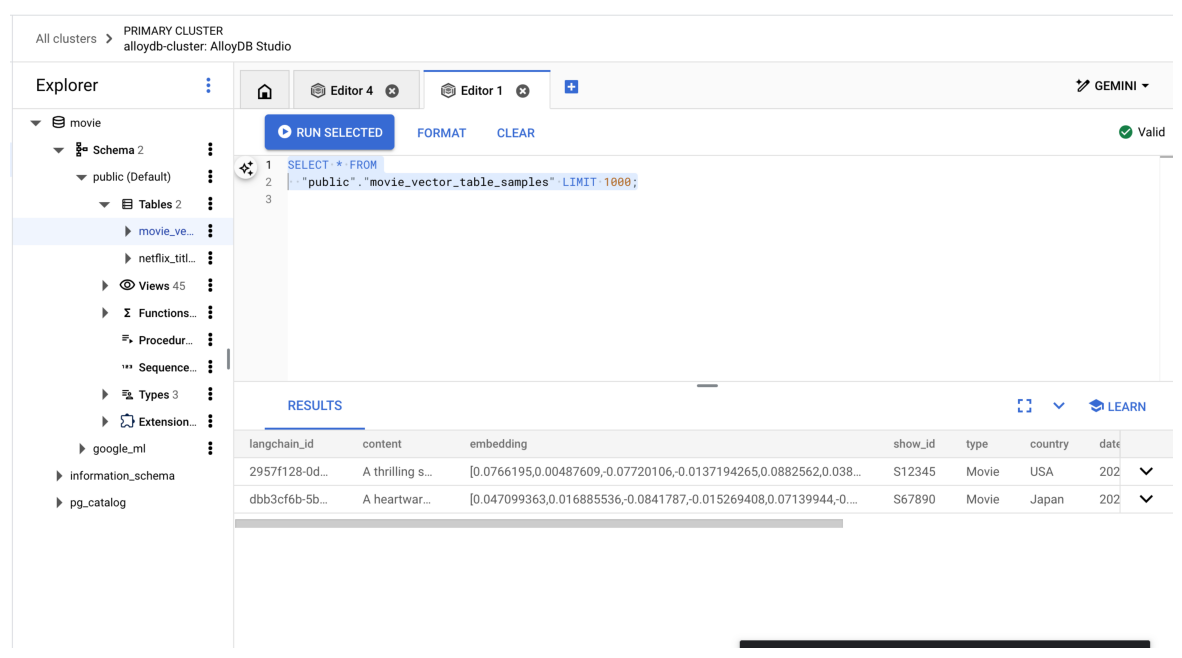

In [24]:
# Extracted File ID from your shared link
file_id = "15JLshRqsmnsWUpiV4cp5xOzg7JTivk6g"
image_url = f"https://drive.google.com/uc?id={file_id}"

# Fetch the image
response = requests.get(image_url)
if response.status_code == 200:
    plt.figure(figsize=(15, 10))
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Error loading image. Check if the link is public.")

### Import the rest of your data into your vector table

You don't have to call the embedding service 8,800 times to load all the documents for the demo. Instead, we have prepared a CSV with the all 8,800+ rows with pre-computed embeddings in a CSV file. You can import the CSV using `gsutil`.

In [ ]:
!gsutil cp gs://cloud-samples-data/langchain/alloydb/netflix_titles_embeddings.csv .

Copying gs://cloud-samples-data/langchain/alloydb/netflix_titles_embeddings.csv...
| [1 files][ 83.6 MiB/ 83.6 MiB]                                                
Operation completed over 1 objects/83.6 MiB.                                     


Use the following code to insert the pregenerated embeddings into your vector store.

In [ ]:
import pandas as pd
netflix_data = "/content/netflix_titles_embeddings.csv"
df = pd.read_csv(netflix_data)
df = df.head(8)#insert 8 row of data

In [ ]:

insert_data_cmd = sqlalchemy.text(
    """
    INSERT INTO movie_vector_table_samples VALUES (:langchain_id, :content, :embedding, :show_id,
      :type, :country, :date_added, :release_year, :rating,
      :duration, :listed_in, :langchain_metadata)
    """
)

parameter_map = [
    {
        "langchain_id": row["langchain_id"],
        "content": row["content"],
        "embedding": row["embedding"],
        "show_id": row["show_id"],
        "type": row["type"],
        "country": row["country"],
        "date_added": row["date_added"],
        "release_year": row["release_year"],
        "rating": row["rating"],
        "duration": row["duration"],
        "listed_in": row["listed_in"],
        "langchain_metadata": row["langchain_metadata"],
    }
    for index, row in df.iterrows()
]

with pool.connect() as db_conn:
    db_conn.execute(
        insert_data_cmd,
        parameter_map,
    )
    db_conn.commit()
connector.close()

# Use case 3: AlloyDB for PostgreSQL as Chat Memory

Next you will add chat history (called “memory” in the context of LangChain) to our application so the LLM can retain context and information across multiple interactions, leading to more coherent and sophisticated conversations or text generation. You can use AlloyDB for PostgreSQL as “memory” storage in our application so that the LLM can use context from prior conversations to better answer the user’s prompts.

In [ ]:
from langchain_google_alloydb_pg import AlloyDBChatMessageHistory, AlloyDBEngine
from langchain_google_alloydb_pg import AlloyDBVectorStore, AlloyDBEngine
from langchain_google_alloydb_pg import AlloyDBEngine, Column

engine = AlloyDBEngine.from_instance(
    project_id=project_id,
    instance=instance_name,
    region=region,
    cluster=cluster_name,
    database=database_name,
    user="postgres",
    password=password,
)
message_table_name = "message_store"

engine.init_chat_history_table(table_name=message_table_name)

chat_history = AlloyDBChatMessageHistory.create_sync(
    engine,
    session_id="my-test-session",
    table_name=message_table_name,
)

Here is an example of how you would add a user message and how you would add an AI message.

In [ ]:
chat_history.add_user_message("Hi!")
chat_history.add_ai_message("Hello there. I'm a model and am happy to help!")

chat_history.messages

[HumanMessage(content='What movie was Brad Pitt in?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='From the provided context, Brad Pitt was in the following movies:\n\n- Inglourious Basterds\n- By the Sea\n- Killing Them Softly\n- Babel', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='How about Jonny Depp?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="From the vector search results, Johnny Depp was in the following movies:\n\n- Charlie and the Chocolate Factory\n- The Rum Diary\n- The Imaginarium of Doctor Parnassus\n- What's Eating Gilbert Grape", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Are there movies about animals?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes, there are movies about animals. Here are some examples from the vector search results:\n\n* **Open Season:** This movie is about a domesticated grizzly bear who finds himself unprepared for the real world after 

## Conversational RAG Chain backed by AlloyDB


Try using all 3 integrations with the `ConversationalRetrievalChain`.

You will build a chatbot that can answer movie related questions based on the vector search results.

In [ ]:
from langchain_google_vertexai import VertexAIEmbeddings, VertexAI
from langchain_core.messages import AIMessage, HumanMessage
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationSummaryBufferMemory
from langchain_core.prompts import PromptTemplate
from langchain_google_alloydb_pg import (
    AlloyDBEngine,
    AlloyDBVectorStore,
    AlloyDBChatMessageHistory,
)

sample_vector_table_name = "movie_vector_table_samples"

# Intialize the embedding service
embeddings_service = VertexAIEmbeddings(
    model_name="textembedding-gecko@003", project=project_id
)

# Intialize the engine
engine = AlloyDBEngine.from_instance(
    project_id=project_id,
    instance=instance_name,
    region=region,
    cluster=cluster_name,
    database=database_name,
    user="postgres",
    password=password,
)
# Intialize the Vector Store
vector_store = AlloyDBVectorStore.create_sync(
    engine=engine,
    embedding_service=embeddings_service,
    table_name=sample_vector_table_name,
    metadata_columns=[
        "show_id",
        "type",
        "country",
        "date_added",
        "release_year",
        "duration",
        "listed_in",
    ],
)

# Intialize the AlloyDBChatMessageHistory
chat_history = AlloyDBChatMessageHistory.create_sync(
    engine,
    session_id="my-test-session",
    table_name="message_store",
)

Create a prompt for the LLM. Here we can add instructions specific to our application, such as "Don't make things up".

In [ ]:
# Prepare some prompt templates for the ConversationalRetrievalChain
prompt = PromptTemplate(
    template="""Use all the information from the context and the conversation history to answer new question. If you see the answer in previous conversation history or the context. \
Answer it with clarifying the source information. If you don't see it in the context or the chat history, just say you \
didn't find the answer in the given data. Don't make things up.

Previous conversation history from the questioner. "Human" was the user who's asking the new question. "Assistant" was you as the assistant:
```{chat_history}
```

Vector search result of the new question:
```{context}
```

New Question:
```{question}```

Answer:""",
    input_variables=["context", "question", "chat_history"],
)
condense_question_prompt_passthrough = PromptTemplate(
    template="""Repeat the following question:
{question}
""",
    input_variables=["question"],
)

Next, create a retriever from the vector store in order to retrieve similar documents via a vector search.

In [ ]:
# Initialize retriever, llm and memory for the chain
retriever = vector_store.as_retriever(
    search_type="mmr", search_kwargs={"k": 5, "lambda_mult": 0.8}
)

Next, initialize our LLM, in this case we are using Vertex AI's "gemini-pro".

In [ ]:
#gemini-pro
llm = VertexAI(model_name="gemini-pro", project=project_id)
#Gemini 1.0 Pro


Clear your chat history, so that our application starts without any prior context to other conversations we have had with the application.

In [ ]:
chat_history.clear()

memory = ConversationSummaryBufferMemory(
    llm=llm,
    chat_memory=chat_history,
    output_key="answer",
    memory_key="chat_history",
    return_messages=True,
)

Now, create a conversational retrieval chain. This will allow the LLM to use chat history in it's responses, meaning we can ask it follow up questions to our questions instead of having to start from scratch after each inquiry.

In [ ]:
# create the ConversationalRetrievalChain
rag_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    verbose=False,
    memory=memory,
    condense_question_prompt=condense_question_prompt_passthrough,
    combine_docs_chain_kwargs={"prompt": prompt},
)

# ask some questions
q = "What movie was Brad Pitt in?"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

q = "How about Jonny Depp?"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

q = "Are there movies about animals?"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

# browser the chat history
chat_history.messages

<ipython-input-16-8710e06fe420>:13: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]


Question: What movie was Brad Pitt in?
Answer: I found several movies that Brad Pitt starred in the previous conversation history: Inglourious Basterds, By the Sea, Killing Them Softly, and Babel.

Question: How about Jonny Depp?
Answer: According to my search results, Johnny Depp starred in several movies:

* **Charlie and the Chocolate Factory (2005)**, directed by Tim Burton. He played the role of Willy Wonka.
* **The Rum Diary (2011)**, directed by Bruce Robinson, based on the novel by Hunter S. Thompson. He played the role of Paul Kemp.
* **The Imaginarium of Doctor Parnassus (2009)**, directed by Terry Gilliam. He played the role of Tony, one of the three men who help Dr. Parnassus fulfill his deal with the devil.
* **What's Eating Gilbert Grape (1993)**, directed by Lasse Hallström. He played the role of Gilbert Grape.

Question: Are there movies about animals?
Answer: Yes, there are many movies about animals. In our previous conversation, I mentioned the DreamWorks Holiday Clas

[HumanMessage(content='What movie was Brad Pitt in?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='I found several movies that Brad Pitt starred in the previous conversation history: Inglourious Basterds, By the Sea, Killing Them Softly, and Babel.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='How about Jonny Depp?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="According to my search results, Johnny Depp starred in several movies:\n\n* **Charlie and the Chocolate Factory (2005)**, directed by Tim Burton. He played the role of Willy Wonka.\n* **The Rum Diary (2011)**, directed by Bruce Robinson, based on the novel by Hunter S. Thompson. He played the role of Paul Kemp.\n* **The Imaginarium of Doctor Parnassus (2009)**, directed by Terry Gilliam. He played the role of Tony, one of the three men who help Dr. Parnassus fulfill his deal with the devil.\n* **What's Eating Gilbert Grape (1993)**, directed by Lasse Hallström. He p

In [ ]:
chat_history.clear()

In [ ]:
q = "in which year My Little Pony was released?"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

Question: in which year My Little Pony was released?
Answer: I'm sorry, I cannot answer your question about the release year of My Little Pony as the information provided to me does not contain that detail.



In [ ]:
q = "what is the story of My Little Pony"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

Question: what is the story of My Little Pony
Answer: I believe the stories you're asking about are based on the My Little Pony animated television series. There have been several iterations of the show, each with its own unique storyline. 

Here's a summary of the stories from the provided information:

- **My Little Pony: Friendship Is Magic:** This series takes place in the magical land of Equestria and follows Twilight Sparkle, a young unicorn who studies the magic of friendship with her five pony friends: Applejack, Pinkie Pie, Rarity, Fluttershy, and Rainbow Dash. They go on various adventures and learn valuable lessons about friendship along the way.
- **Equestria Girls: Tales of Canterlot High:** This series takes place in an alternate universe where the ponies are teenage girls attending Canterlot High. They must learn what it means to be human and face the challenges of high school life while maintaining their friendships.
- **My Little Pony: A New Generation:** This series t

In [ ]:
q = "is Midnight Mass movie or web series"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

Question: is Midnight Mass movie or web series
Answer: The vector search results show that "Midnight Mass" is a **web series**.



In [ ]:
q = "Tell me deatils about The Great British Baking Show"
ans = rag_chain({"question": q, "chat_history": chat_history})["answer"]
print(f"Question: {q}\nAnswer: {ans}\n")

Question: Tell me deatils about The Great British Baking Show
Answer: ##  The Great British Baking Show: A Delightful Baking Competition  

**What is it?**

* The Great British Baking Show (also known as The Great British Bake Off) is a popular television baking competition. 
* Amateur bakers from across the UK compete in weekly challenges showcasing their baking skills. 
* Judges Paul Hollywood and Prue Leith assess the contestants' efforts, offering constructive feedback and ultimately deciding who stays and who leaves each week. 
* The winner is crowned Britain's Best Amateur Baker.

**Where did it originate?**

* The first episode was aired in 2010, quickly gaining immense popularity in the UK. 
* Its international success led to numerous adaptations around the world, including The Great American Baking Show in the US, The Great Canadian Baking Show, and many more.

**What makes it so special?**

* **Warm atmosphere:** It's known for its warm and friendly atmosphere, where contesta